# Imports

In [16]:
import pandas as pd
from sklearn import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Pandas

Think of pandas as just a really nice convenience to get your labelled data into an n dimensional array without
any additional numpy overhead. Consider the numpy way:

In [17]:
f = 'iris.data'
f = open(f, 'r')
f = f.readlines()
for i in range(len(f)):
    f[i] = f[i].strip('\n')

isample_dtype = np.dtype([('id', np.uint8),])

features = []
for feature in f[0].split(','):
    features.append(feature)
    
dtypes = [('id', np.uint8)]
for feature in features:
    if feature == 'species':
        dtypes.append((feature, 'U10'))
    else:
        dtypes.append((feature, np.float64))
        
isample_dtype = np.dtype(dtypes)

samples = []
for l in range(1, len(f)):
    f[l] = f[l].strip('\n')
    s = f[l].split(',')
    s = (l, float(s[0]), float(s[1]), float(s[2]), float(s[3]), s[4])
    s = np.array([s], dtype=isample_dtype)
    samples.append(s)
    
samples = np.array(samples)



print(samples)

[[(  1, 5.1, 3.5, 1.4, 0.2, 'setosa')]
 [(  2, 4.9, 3. , 1.4, 0.2, 'setosa')]
 [(  3, 4.7, 3.2, 1.3, 0.2, 'setosa')]
 [(  4, 4.6, 3.1, 1.5, 0.2, 'setosa')]
 [(  5, 5. , 3.6, 1.4, 0.2, 'setosa')]
 [(  6, 5.4, 3.9, 1.7, 0.4, 'setosa')]
 [(  7, 4.6, 3.4, 1.4, 0.3, 'setosa')]
 [(  8, 5. , 3.4, 1.5, 0.2, 'setosa')]
 [(  9, 4.4, 2.9, 1.4, 0.2, 'setosa')]
 [( 10, 4.9, 3.1, 1.5, 0.1, 'setosa')]
 [( 11, 5.4, 3.7, 1.5, 0.2, 'setosa')]
 [( 12, 4.8, 3.4, 1.6, 0.2, 'setosa')]
 [( 13, 4.8, 3. , 1.4, 0.1, 'setosa')]
 [( 14, 4.3, 3. , 1.1, 0.1, 'setosa')]
 [( 15, 5.8, 4. , 1.2, 0.2, 'setosa')]
 [( 16, 5.7, 4.4, 1.5, 0.4, 'setosa')]
 [( 17, 5.4, 3.9, 1.3, 0.4, 'setosa')]
 [( 18, 5.1, 3.5, 1.4, 0.3, 'setosa')]
 [( 19, 5.7, 3.8, 1.7, 0.3, 'setosa')]
 [( 20, 5.1, 3.8, 1.5, 0.3, 'setosa')]
 [( 21, 5.4, 3.4, 1.7, 0.2, 'setosa')]
 [( 22, 5.1, 3.7, 1.5, 0.4, 'setosa')]
 [( 23, 4.6, 3.6, 1. , 0.2, 'setosa')]
 [( 24, 5.1, 3.3, 1.7, 0.5, 'setosa')]
 [( 25, 4.8, 3.4, 1.9, 0.2, 'setosa')]
 [( 26, 5. , 3. , 1.6, 0.

There is nothing wrong with this, but it's just more boilerplate over head in our workflow that we don't need. Plus it requires us to know the types of every single part of each data sample, which we may not. Finally, printing it is just ugly. Now look at what pandas does: 

In [18]:
raw_iris = pd.read_csv('iris.data')

In [19]:
pd.DataFrame.from_records(raw_iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Cleaner, simpler, no gotchas. Use pandas. 

In [20]:
iris_df = pd.DataFrame.from_records(raw_iris)

# Seaborn

Just as pandas was numpy for labelled data of arbitrary types, seaborn is matplotlib for labelled data types.
Instead of having to worry about the overhead associated with generating vectors for individual features, then
generating a grid of subplots, and iterating through both while making sure all datatypes match, we can just
punt everything to seaborn. 

Seaborn makes plotting labelled data and statistics simple. Use seaborn. 

/Users/A_Gilbert/Programming/Python/anaconda2/envs/py35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


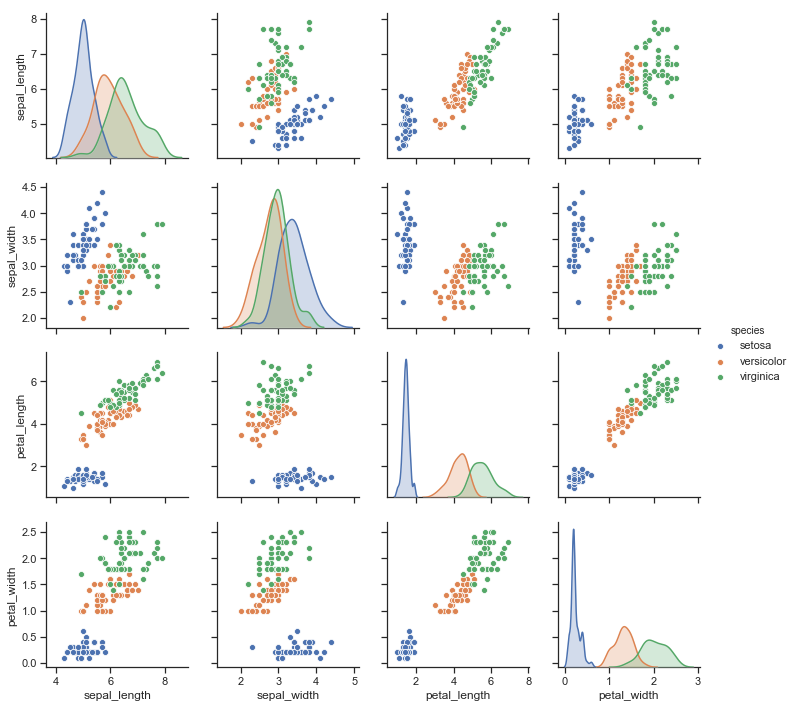

In [21]:
sns.set(style="ticks")

sns.pairplot(iris_df, hue="species")

If we wanted a more compact value, we could do this:

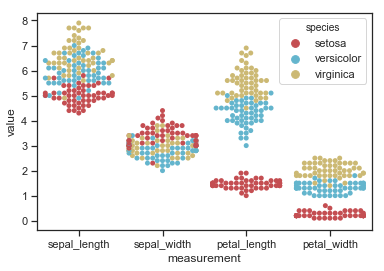

In [22]:
iris_melt = pd.melt(iris_df, "species", var_name='measurement')
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris_melt)

Seaborn gives us a way to see the raw input distributions before classification training:

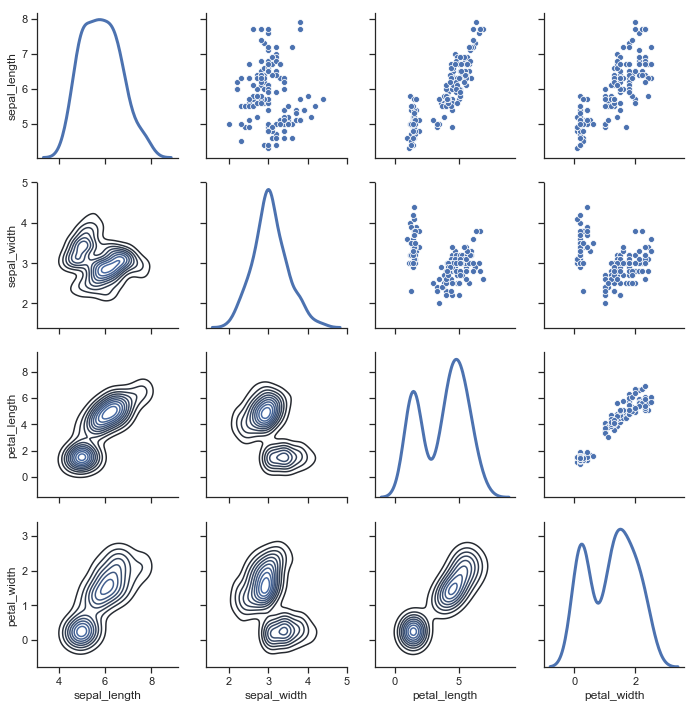

In [23]:
g = sns.PairGrid(iris_df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

# Scikit-Learn

Nobody wants to code a perceptron everytime they need it. Nobody wants to code anything really; Scikit-Learn lets us continue honoring this traditional cs stance for a variety of ML pipeline components:  
![title](Pic1.png)

We will look at each of these components in more detail as we go, but to get a feel for how Sci

## Logistic Regression

David's Adaline classifier uses a linear activation function to judge weights. That is for each element of the weight vector, the change at every epoch is

\begin{align}
\Delta w_{j} &= \eta\sum_{i}\left(y^{(i)}-\mathbf{w}\cdot\mathbf{x}^{(i)}\right)x^{(i)}_{j}
\end{align}

which comes from minimizing the loss function 

\begin{align}
J(\mathbf{w}) = \frac{1}{2}\sum_{i}\left(y^{(i)}-\mathbf{w}\cdot\mathbf{x}^{(i)}\right)^{2}
\end{align}

The activation function implied above is $\mathbf{w}\cdot\mathbf{x}$. This function is 
not ideal for convergence or performance. Consider what happens if each classification
has samples that are extremely far from the line separating them: each weight over-reacts
in the update due to large difference between $y^{i}$ and the linearly predicted value. 
It also means that any clusters far from the border disproportionately affect each weight. This means the linear perceptron requires more iterations while still tending to
misclassify samples close to the border to get extreme values right. 


To fix this, we choose a new activation function that asymptotes to the right classification values:

\begin{align}
\phi(\mathbf{w}\cdot\mathbf{x}) = \frac{1}{1+e^{-\mathbf{w}\cdot\mathbf{x}}}
\end{align}

This is a sigmoid function:

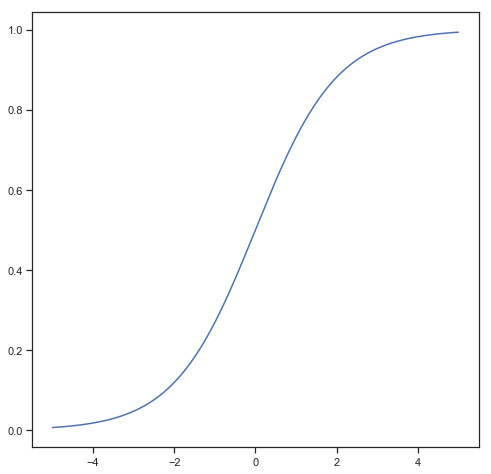

In [24]:
plt.close('all')
plt.figure(figsize=(8,8))
x = np.linspace(-5, 5, num=200)
y = 1/(1 + np.exp(-1*x))

plt.plot(x, y)

Now samples far from the border become negligible as soon as the weights get them right, and allow the samples close to the border to become more significant, leading to more accurate classification. 

An additional way to constrain the fit is by regularization. For any given cost function
$J_{0}(\mathbf{w})$, we can define a new cost function by
\begin{align}
J_{1}(\mathbf{w}) \equiv J_{0}(\mathbf{w}) + \frac{\lambda}{2}\mathbf{w}\cdot\mathbf{w}
\end{align}

The new term acts like an "kinetic energy" if you are familiar with classical mechanics.
Essentially it means we consider very large values of $\mathbf{w}$ to be wrong; 
equivalently, it means that we want our classification to use as little information 
from each feature of all samples as possible. The degree to which we want this to be true
is defined by the regularization parameter $\lambda$. Lets put this all together with scikit:

In [25]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [28]:
lamb = 5
my_c = 1.0/lamb
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
#class labels in sklearn are denoted by integers fyi. 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                           test_size=0.3,
                                                                           random_state=1,
                                                                           stratify=y)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [29]:
#normalize data
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Unregularized Logistic Regression

/Users/A_Gilbert/Programming/Python/anaconda2/envs/py35/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/A_Gilbert/Programming/Python/anaconda2/envs/py35/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D ar

NameError: name 'versiontuple' is not defined

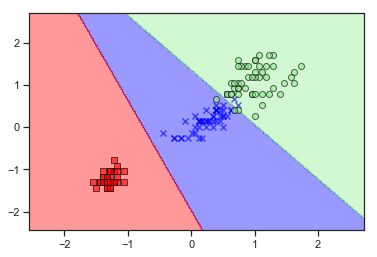

In [30]:
lr = sklearn.linear_model.LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Logistic Regression w/ Regularization

/Users/A_Gilbert/Programming/Python/anaconda2/envs/py35/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/A_Gilbert/Programming/Python/anaconda2/envs/py35/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/A_Gilbert/Programming/Python/anaconda2/envs/py35/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/A_Gilbert/Programming/Python/anaconda2/envs/py35/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option t

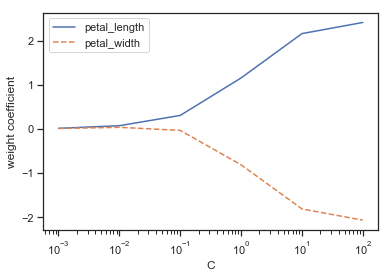

In [39]:
weights, params = [], []
lrs = []


for c in np.arange(-3, 3):
    lr = linear_model.LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    lrs.append(lr)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)

plt.close('all')
plt.plot(params, weights[:, 0], label='petal_length')
plt.plot(params, weights[:, 1], label='petal_width', linestyle='--')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


NameError: name 'versiontuple' is not defined

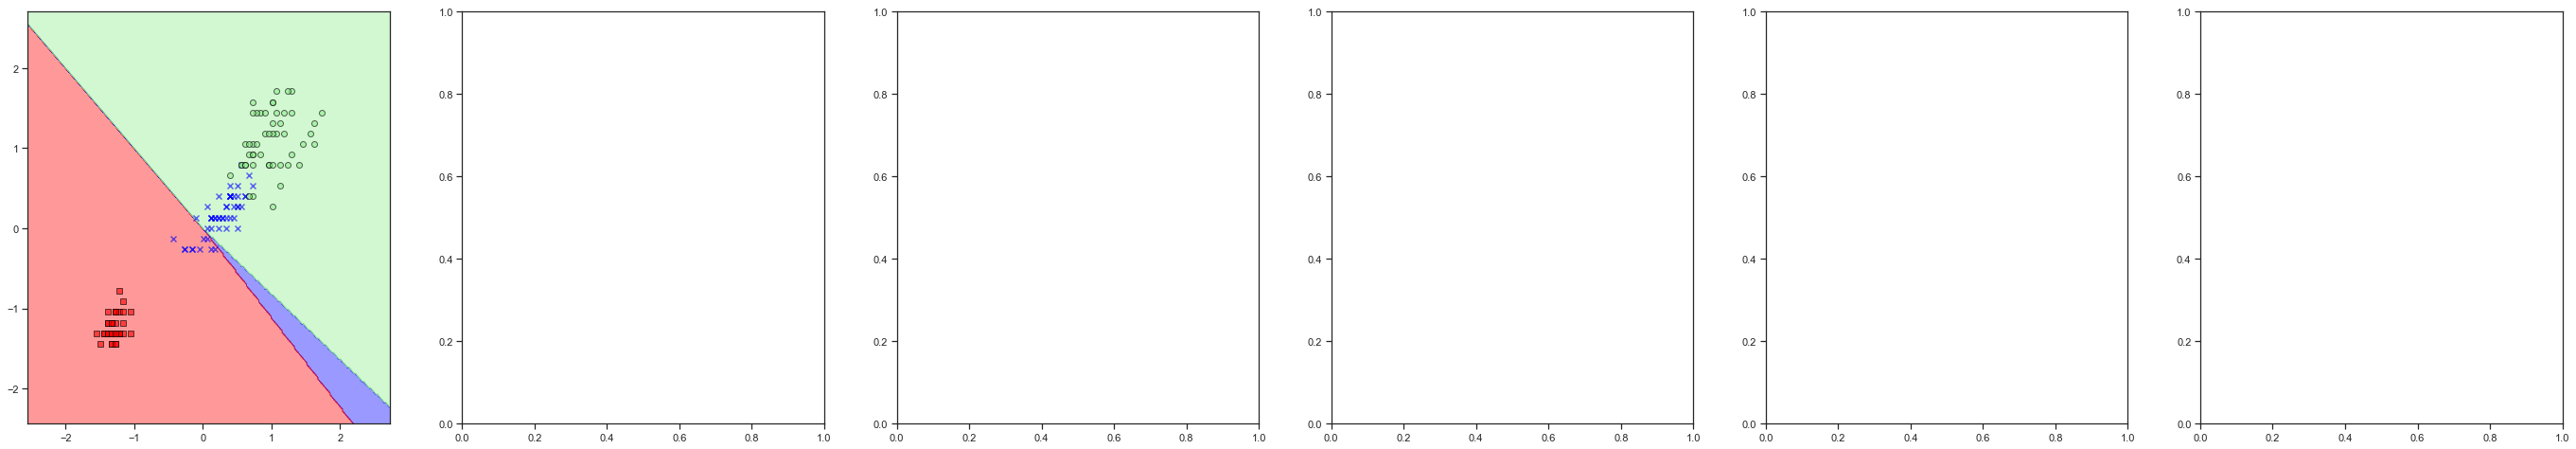

In [40]:
# See different C  values

plt.close('all')

fig, axs = plt.subplots(1, 6, figsize=(48, 8))

for i in range(6):
    plt.sca(axs[i])
    plot_decision_regions(X_combined_std, y_combined,
                      classifier=lrs[i], test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.title('C = %f' % params[i])
    plt.tight_layout()
plt.show()